In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime

#FROM the sample data of one day to conacatinate all the csv files of each hour into a single one

directory = '/Users/thomas/Desktop/phd_unipv/Industrial_PhD/Technical_documentation/20240707/csv_incl'

one_hr_datframes= []

for file in os.listdir(directory):
    if file.endswith('.csv'):
        file_path = os.path.join(directory, file)
        
        df = pd.read_csv(file_path, sep=';')

        df_two_col = df[['time','03067802_x']]

        one_hr_datframes.append(df_two_col)

        
  
#dataframe file conatining one day data 
master_df = pd.concat(one_hr_datframes, ignore_index=True)


In [5]:
#converting time column to datetime to recognise the dates
master_df['time'] = pd.to_datetime(master_df['time'], format='%Y/%m/%d %H:%M:%S')

master_df.head()

master_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86400 entries, 0 to 86399
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        86400 non-null  datetime64[ns]
 1   03067802_x  86360 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.3 MB


In [6]:
#selecting the datetime column to index for resampling 
master_df = master_df.set_index('time')

master_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86400 entries, 2024-07-07 14:00:00 to 2024-07-07 06:59:59
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   03067802_x  86360 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


<AxesSubplot: xlabel='time'>

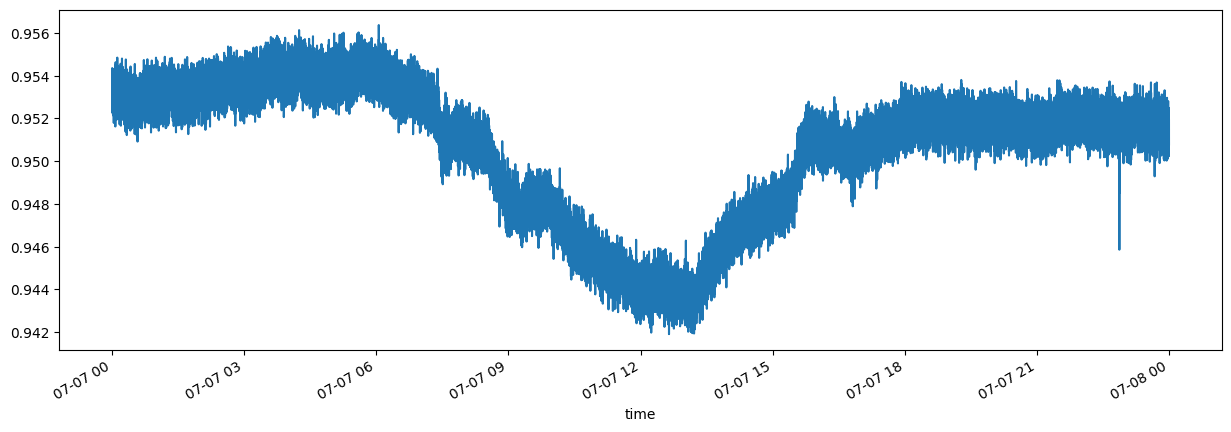

In [11]:
master_df['03067802_x'].plot(figsize=(15,5))

In [ ]:
histogram = master_df['03067802_x'].plot.hist(bins=200, alpha=0.5)


In [9]:
#resampling by min freq
df_by_min = master_df.resample('T').mean()

print(df_by_min)

                     03067802_x
time                           
2024-07-07 00:00:00    0.953241
2024-07-07 00:01:00    0.953215
2024-07-07 00:02:00    0.953245
2024-07-07 00:03:00    0.953102
2024-07-07 00:04:00    0.953083
...                         ...
2024-07-07 23:55:00    0.951792
2024-07-07 23:56:00    0.951736
2024-07-07 23:57:00    0.951357
2024-07-07 23:58:00    0.951588
2024-07-07 23:59:00    0.951537

[1440 rows x 1 columns]


<AxesSubplot: xlabel='time'>

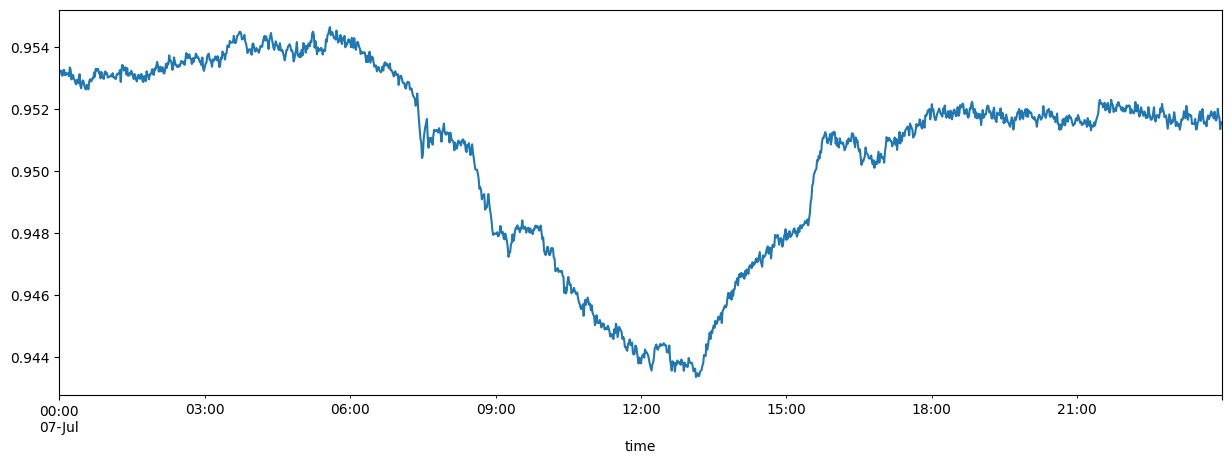

In [10]:
df_by_min['03067802_x'].plot(figsize=(15,5))